# **MÓDULO 19**
# Exercício: Estatística Aplicada

**Efetividade de Duas Estratégias de Ensino**

Imagine que uma escola esteja avaliando a eficácia de duas estratégias de ensino de matemática para alunos do ensino médio. Eles querem determinar se há uma diferença significativa no desempenho médio dos alunos entre as duas estratégias.

# **Hipóteses:**

* Hipótese nula (H0): A média das notas dos alunos na estratégia A é igual à média das notas dos alunos na estratégia B.
* Hipótese alternativa (H1): A média das notas na Estratégia B é maior do que a média das notas na Estratégia A.

# **Dados:**

* Amostra da Estratégia A: Notas de 50 alunos que receberam a Estratégia A.
* Amostra da Estratégia B: Notas de 50 alunos que receberam a Estratégia B.

Usaremos um teste Z para comparar as médias das notas entre as duas amostras.

Se o p-valor do teste Z for menor que um nível de significância pré-determinado (por exemplo, α = 0.05), rejeitamos a hipótese nula e concluímos que há uma diferença significativa nas médias das notas entre as duas estratégias de ensino.

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import math

Os dados são criados a seguir:

In [167]:
# Definindo médias e desvios padrão para as notas nas duas estratégias
media_estrategia_A = 70
desvio_padrao_estrategia_A = 10

media_estrategia_B = 75
desvio_padrao_estrategia_B = 12

# Gerando as amostras de notas para cada estratégia de ensino da nossa base
np.random.seed(0)  # Para garantir a reprodutibilidade dos resultados
amostra_estrategia_A = np.random.normal(loc=media_estrategia_A, scale=desvio_padrao_estrategia_A, size=50)
amostra_estrategia_B = np.random.normal(loc=media_estrategia_B, scale=desvio_padrao_estrategia_B, size=50)

print("Notas da Estratégia A:", amostra_estrategia_A[:5])
print("Notas da Estratégia B:", amostra_estrategia_B[:5])

Notas da Estratégia A: [87.64052346 74.00157208 79.78737984 92.40893199 88.6755799 ]
Notas da Estratégia B: [64.25440127 79.64282997 68.87033835 60.83241379 74.66181326]


# 1) De acordo com as informações analisadas o nosso teste é unilateral á direita, esquerda ou bicaudal? Justifique.




Estamos lidando com um teste unilateral a direita, pois conforme o enunciado, a hipótese alternativa afirma que a média da nota dos alunos que foram submetidos a estratégia de ensino B é **maior**, que a média da nota dos alunos que foram submetidos a estratégia de ensino A.

# 2) Calcule as médias para as duas amostragens e as variâncias. Quais insights você pode retirar comparando os dados?

In [171]:
estatisticas = pd.Series()
estatisticas["Media_A"] = amostra_estrategia_A.mean()
estatisticas["Media_B"] = amostra_estrategia_B.mean()
estatisticas["Variância_A"] = amostra_estrategia_A.std()**2
estatisticas["Variância_B"] = amostra_estrategia_B.std()**2

In [172]:
estatisticas

Media_A         71.405593
Media_B         74.748681
Variância_A    126.680184
Variância_B    108.260620
dtype: float64

# 3) Imprima os resultados da estatística do teste Z, p value e indique se rejeitaremos ou não a hipótese nula. Justifique sua resposta.

In [174]:
# Definindo o nível de significância:
sig_lvl = 0.05

# Calculando o valor de z:
z_statistic = (estatisticas["Media_B"] - estatisticas["Media_A"]) / math.sqrt(
    (estatisticas["Variância_B"] / len(amostra_estrategia_B)) + 
    (estatisticas["Variância_A"] / len(amostra_estrategia_A)))

# Calculando o valor de p:
p_value = 1 * (1 - stats.norm.cdf(abs(z_statistic)))

print(f"Valor de P: {p_value}\n"
f"Valor de Z: {z_statistic}")

if p_value < sig_lvl:
    print("\n Hipótese nula rejeitada! A média das notas dos alunos da estratégia B são mais altas!")

else:
    print("\n Hipotese nula aceita! A média das notas dos alunos da estratégia B é igual a média das notas dos alunos da estratégia A! ")

Valor de P: 0.06150692063904595
Valor de Z: 1.5422459359025387

 Hipotese nula aceita! A média das notas dos alunos da estratégia B é igual a média das notas dos alunos da estratégia A! 


Após calcularmos os valores de Z e de P, iremos aceitar a hipótese nula, pois o valor de probabilidade observado está a cima do limite máximo do nivel de significância que definimos, que é de 5%.

# 4) Para finalizar monte o gráfico da distribuição da estatística do nosso teste Z e explique o que pode ser observado através dele.

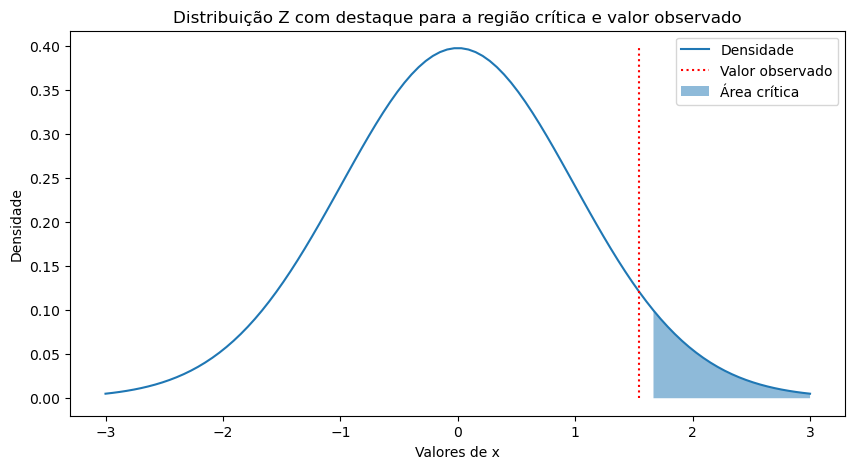

In [177]:
fig, ax = plt.subplots(figsize=(10, 5))

# Parâmetros da densidade sob H0
mu = 0 # É a média da distribuição t sob a hipótese nula, no caso da distribuição t, a média é sempre 0.
variance = 1  # É a variância da distribuição t sob a hipótese nula, para a distribuição t, a variância é sempre 1.
sigma = variance**.5  #É o desvio padrão da distribuição t sob a hipótese nula. Como a variância é 1, o desvio padrão é a raiz quadrada da variância, ou seja, 1.

# Valores de X e Y para plotar a densidade do nosso gráfico
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.t.pdf(x, len(amostra_estrategia_B) + len(amostra_estrategia_A) - 2)

# Essas linhas de código estão calculando os limites da região crítica do teste t
low = stats.t.ppf(.95, len(amostra_estrategia_B) + len(amostra_estrategia_A) - 2)
#len(taxa_conversao_antiga) - 2): Isso calcula o percentil 95 da distribuição t.
#
high = np.inf

# Gráfico da densidade
ax.plot(x, y, label='Densidade')

# Marcação do valor observado da estatística do teste
ax.vlines(x=[z_statistic], ymin=0, ymax=y.max(), colors='r', linestyles='dotted', label='Valor observado')

# Preenchendo a área crítica
plt.fill_between(x, y, where=(low < x) & (x < high), alpha=.5, label='Área crítica')

#Plotagem padrão do gráfico
plt.legend()
plt.xlabel('Valores de x')
plt.ylabel('Densidade')
plt.title('Distribuição Z com destaque para a região crítica e valor observado')
plt.show()